# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [5]:
a1 = pd.read_csv(r"C:\Users\Lenovo\Desktop\DSEU\Projects\Dataset\Loan_Prediction_Dataset.csv")
a1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
a1. describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
a1. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

In [8]:
a1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Imputation

Filling values with mean

In [10]:
a1['LoanAmount'] = a1['LoanAmount'].fillna(a1['LoanAmount'].mean())
a1['Loan_Amount_Term'] = a1['Loan_Amount_Term'].fillna(a1['Loan_Amount_Term'].mean())
a1['Credit_History'] = a1['Credit_History'].fillna(a1['Credit_History'].mean())

Filling values with mode

In [12]:
# fill the missing values for categorical terms - mode
a1['Gender'] = a1["Gender"].fillna(a1['Gender'].mode()[0])
a1['Married'] = a1["Married"].fillna(a1['Married'].mode()[0])
a1['Dependents'] = a1["Dependents"].fillna(a1['Dependents'].mode()[0])
a1['Self_Employed'] = a1["Self_Employed"].fillna(a1['Self_Employed'].mode()[0])

In [14]:
a1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA    : By categories

<AxesSubplot:xlabel='Gender', ylabel='count'>

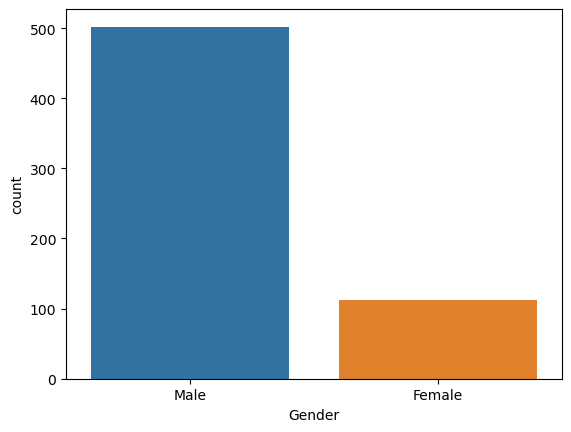

In [15]:
sns.countplot(a1['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

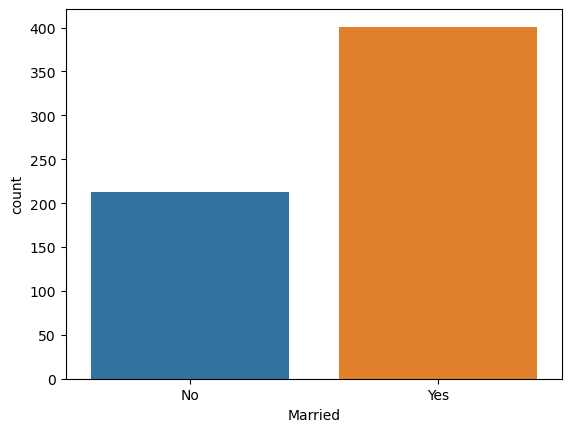

In [16]:
sns.countplot(a1['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

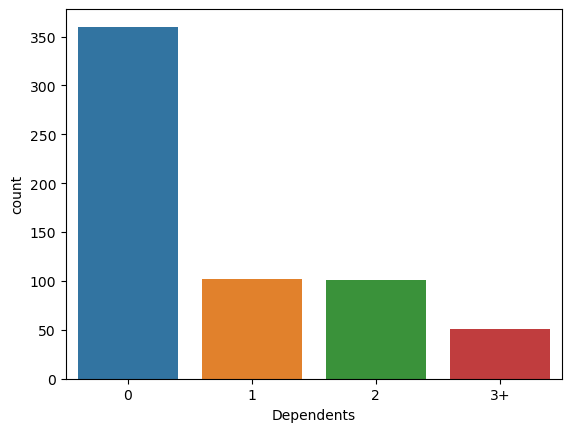

In [17]:
sns.countplot(a1['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

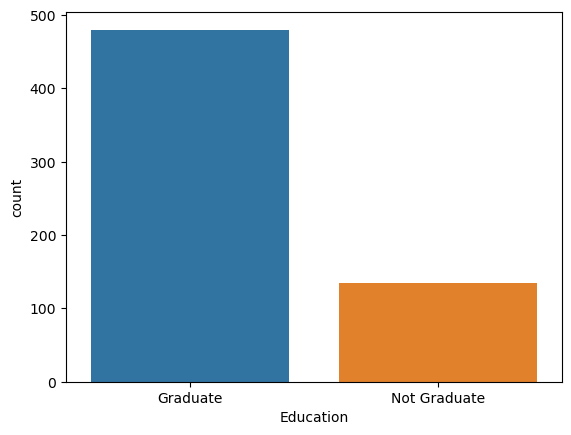

In [18]:
sns.countplot(a1['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

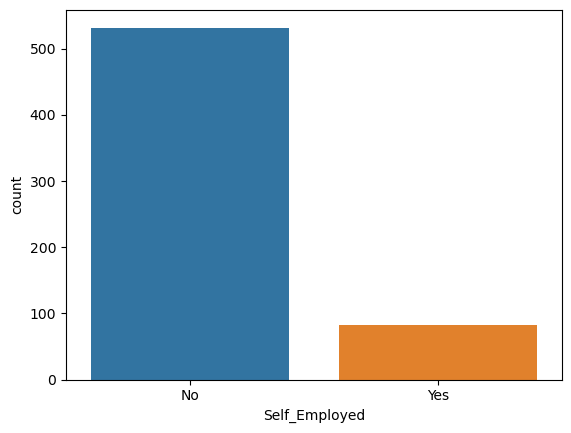

In [19]:
sns.countplot(a1['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

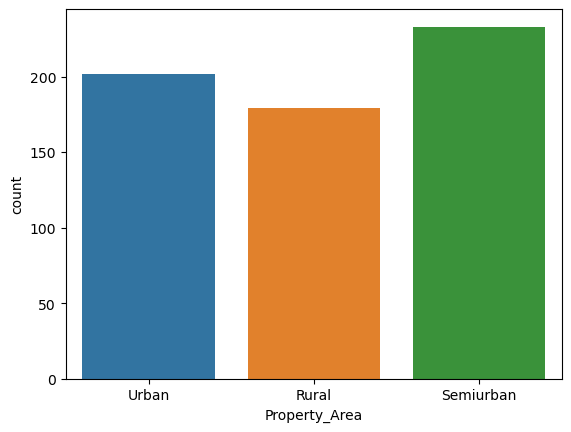

In [20]:
sns.countplot(a1['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

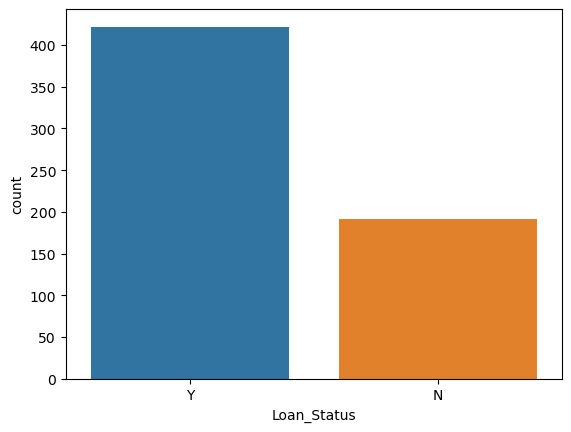

In [21]:
sns.countplot(a1['Loan_Status'])

# Numerical attributes visualization

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

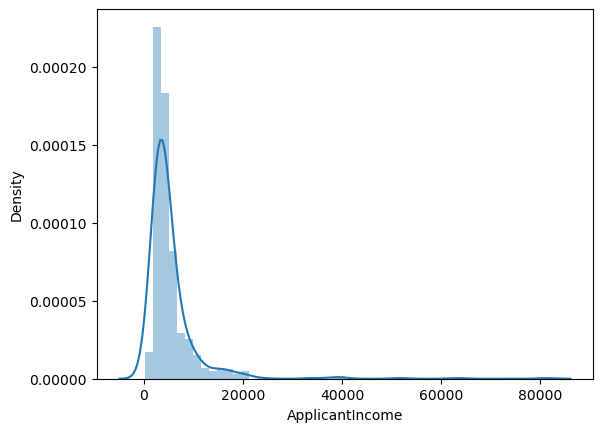

In [25]:
sns.distplot(a1['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

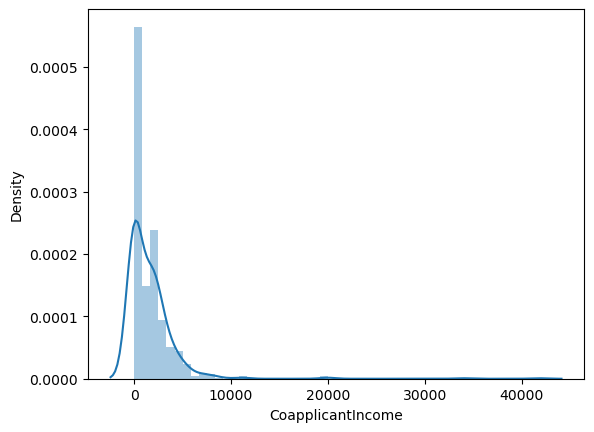

In [26]:
sns.distplot(a1["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

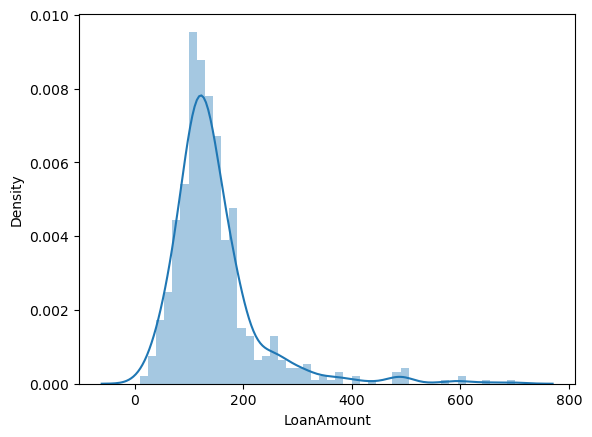

In [27]:
sns.distplot(a1["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

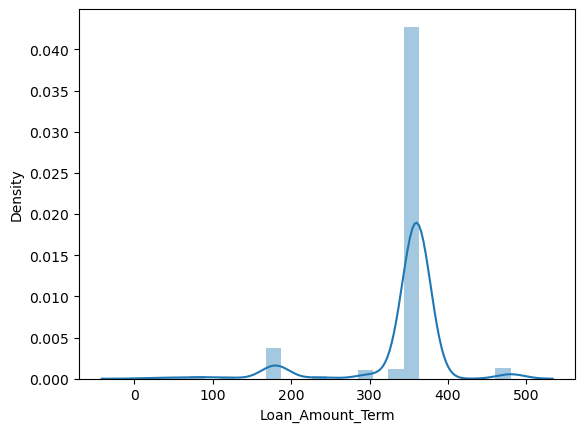

In [28]:
sns.distplot(a1['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

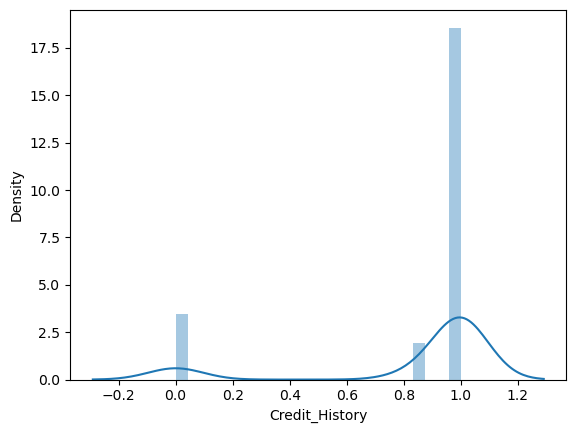

In [29]:
sns.distplot(a1['Credit_History'])

# Total income

In [30]:
a1['Total_Income'] = a1['ApplicantIncome'] + a1['CoapplicantIncome']
a1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

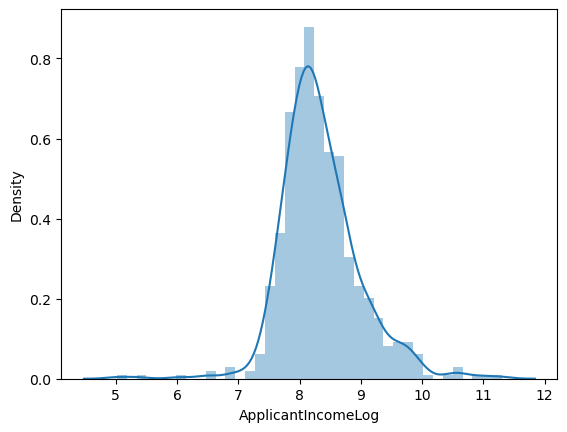

In [67]:
# apply log transformation to the attribute
a1['ApplicantIncomeLog'] = np.log(a1['ApplicantIncome']+1)
sns.distplot(a1["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

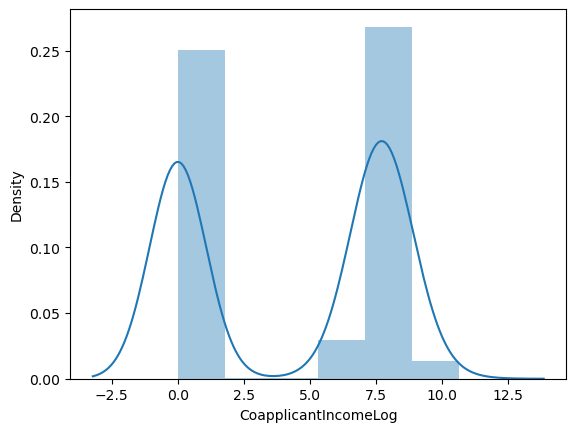

In [64]:
a1['CoapplicantIncomeLog'] = np.log(a1['CoapplicantIncome']+1)
sns.distplot(a1["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

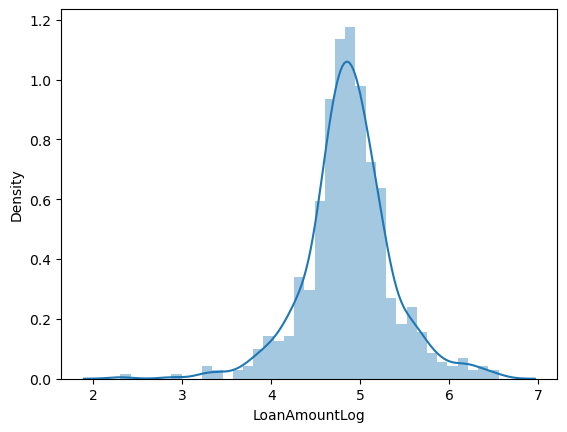

In [65]:
a1['LoanAmountLog'] = np.log(a1['LoanAmount']+1)
sns.distplot(a1["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

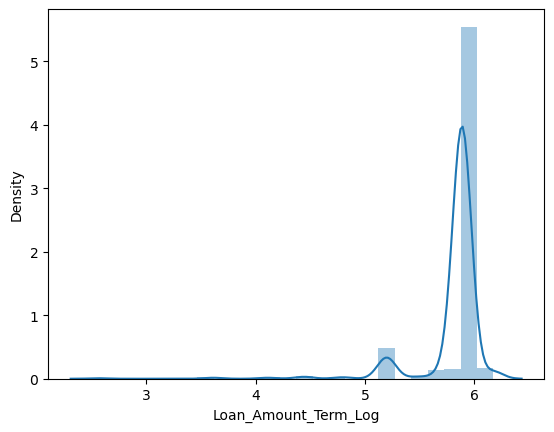

In [66]:
a1['Loan_Amount_Term_Log'] = np.log(a1['Loan_Amount_Term']+1)
sns.distplot(a1["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

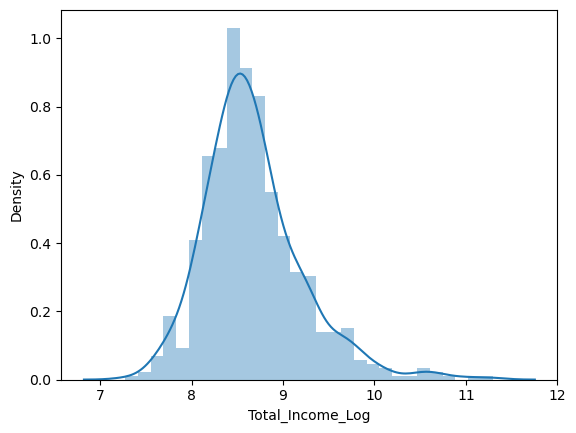

In [68]:
a1['Total_Income_Log'] = np.log(a1['Total_Income']+1)
sns.distplot(a1["Total_Income_Log"])

# Correlation matrix

<AxesSubplot:>

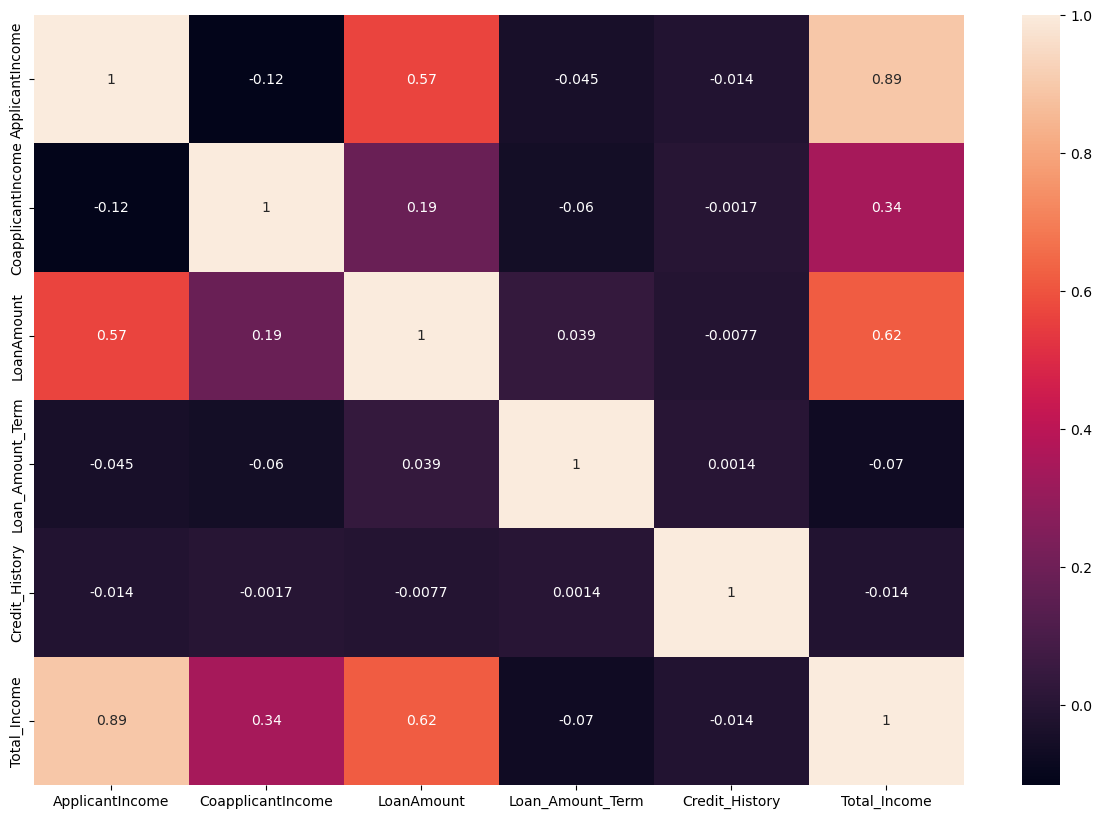

In [31]:
corr = a1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

In [75]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
a1 = a1.drop(columns=cols, axis=1)
a1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


# Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    a1[col] = le.fit_transform(a1[col])

In [77]:
a1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


# Train test split

In [78]:
# specify input and output attributes
X = a1.drop(columns=['Loan_Status'], axis=1)
y = a1['Loan_Status']

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=8)

# Model Training

In [80]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [100]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
298,0,0,0,0,0,1.000000,0,8.517393,5.023881,6.175867,8.928243
427,1,1,2,0,0,1.000000,1,8.688791,4.897840,5.888878,8.688791
185,1,1,0,0,1,1.000000,1,10.575105,4.795791,5.888878,10.689624
80,0,0,0,0,0,1.000000,1,8.255049,4.718499,5.888878,8.255049
486,1,0,2,0,0,0.000000,0,8.174139,4.394449,5.888878,8.174139
...,...,...,...,...,...,...,...,...,...,...,...
136,0,1,0,0,0,1.000000,0,8.430327,4.442651,5.888878,8.430327
133,1,1,0,0,1,1.000000,1,8.149024,3.258097,4.795791,8.149024
361,1,1,2,0,0,1.000000,1,8.517393,5.468060,5.888878,9.067393
340,1,1,3,1,0,1.000000,0,7.881560,5.159055,5.888878,8.351139


In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 72.72727272727273
Cross validation is 71.50606424097028


In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 78.57142857142857
Cross validation is 78.82980141276823


# Confusion matrix

In [88]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 3,  1],
       [ 1, 15]], dtype=int64)

<AxesSubplot:>

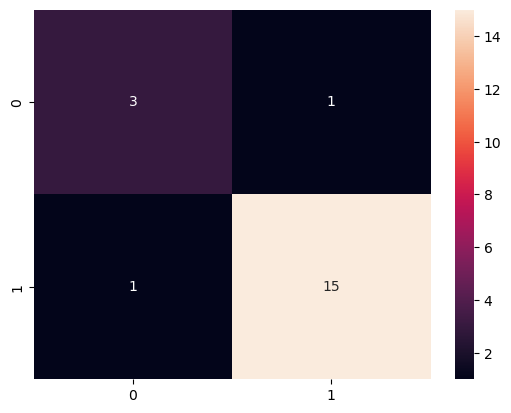

In [90]:
sns.heatmap(cm, annot=True)

In [95]:
# import pickle

# pickle.dump(model, open('model.pkl', 'wb'))

TypeError: dump() missing required argument 'file' (pos 2)